In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

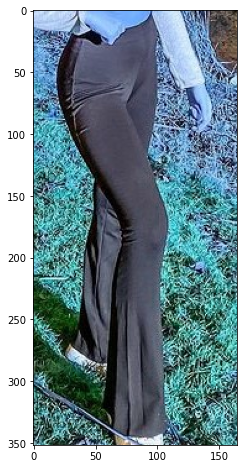

In [190]:
sep_coins = cv2.imread('../DATA/pennies.jpg');
sep_coins = cv2.imread('../DATA/Schlaghose2.jpg');
#pants = cv2.imread('../DATA/pants.jpg');
display(sep_coins)

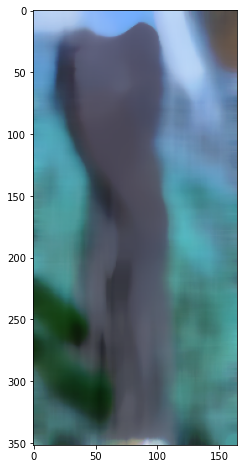

In [191]:
sep_blur = cv2.medianBlur(sep_coins,25)
display(sep_blur)

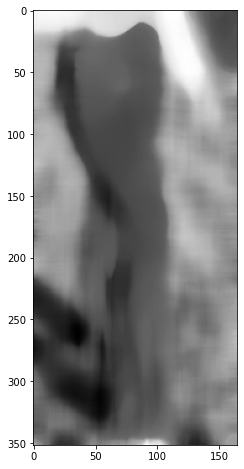

In [192]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins, cmap='gray')

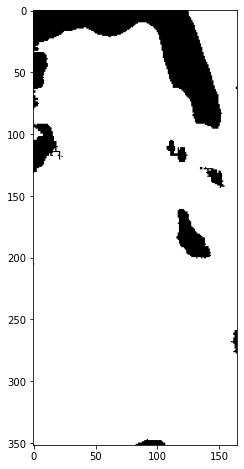

In [193]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh, cmap='gray')

In [194]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

9

In [195]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255, 0, 0), 10)
        

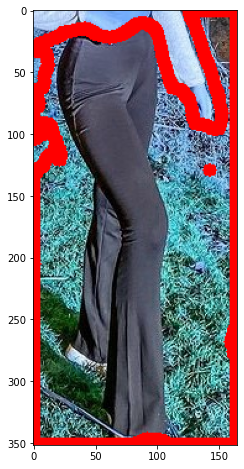

In [196]:
display(sep_coins)

In [3]:
img = cv2.imread('../DATA/pennies.jpg')
img = cv2.imread('../DATA/WTF.jpg')

In [4]:
img_blur = cv2.medianBlur(img, 5)

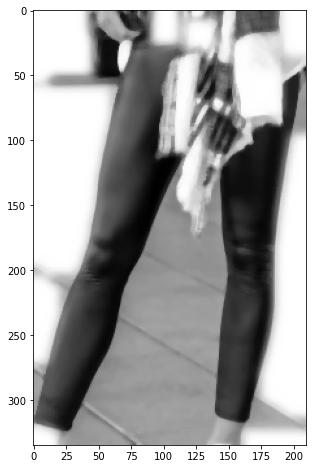

In [5]:
gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
display(gray, cmap='gray')

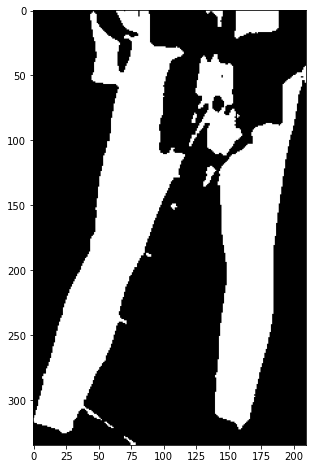

In [6]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(thresh,cmap='gray')

In [7]:
kernel = np.ones((3,3), np.uint8)

In [8]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [9]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations=2)

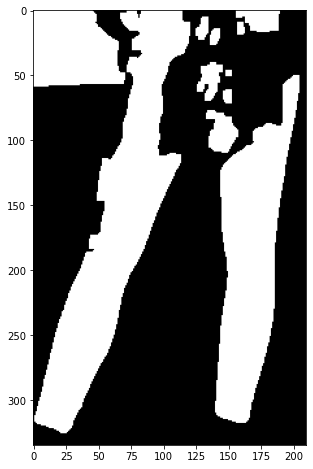

In [527]:
display(opening, cmap='gray')

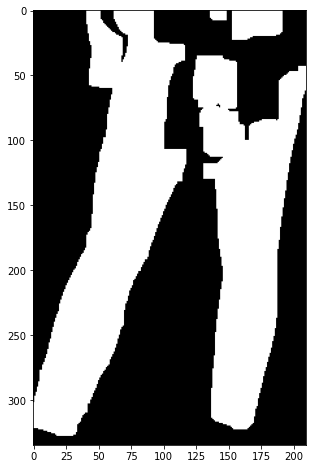

In [10]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg, cmap='gray')

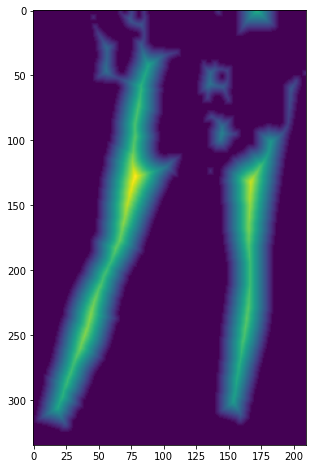

In [11]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(dist_transform)

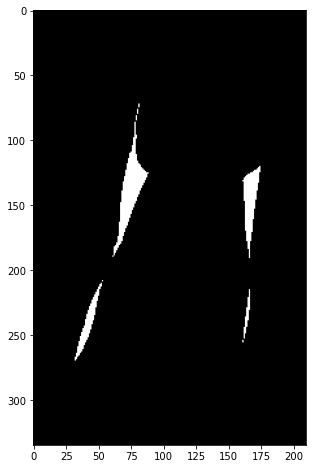

In [12]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(sure_fg,cmap='gray')

In [13]:
sure_fg = np.uint8(sure_fg)

In [14]:
unknown = cv2.subtract(sure_bg, sure_fg)

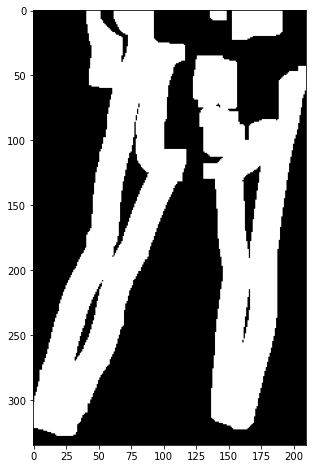

In [15]:
display(unknown,cmap='gray')

In [16]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0

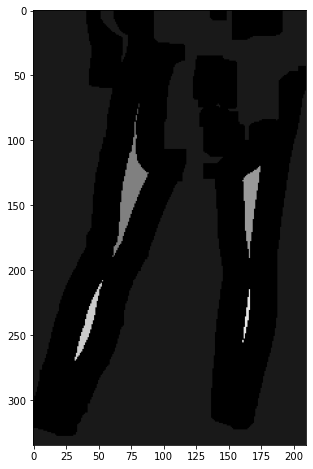

In [17]:
display(markers, cmap='gray')

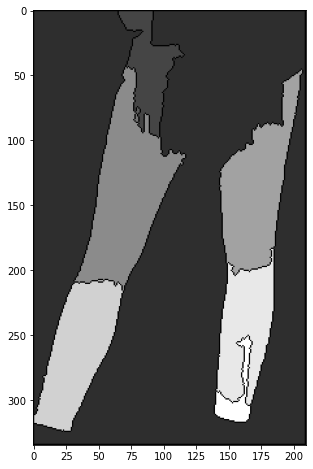

In [18]:
markers = cv2.watershed(img, markers)
display(markers, cmap='gray')

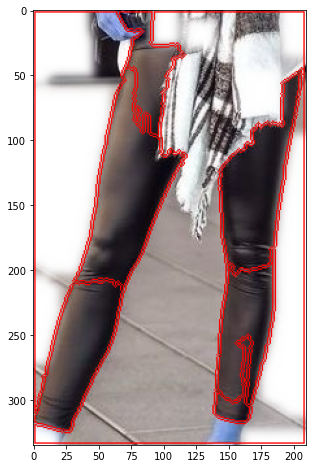

In [19]:
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255, 0, 0), 1)
        
display(img,cmap='gray')

In [20]:
img = cv2.imread('../DATA/pants.jpg')
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        print('Hallo')
        cv2.drawContours(img,contours,i,(255, 0, 0), 1)
cv2.fillPoly(contourImg, pts =[largestContour], color=(255,255,255))
display(img,cmap='gray')

Hallo
Hallo
Hallo
Hallo
Hallo
Hallo
Hallo
Hallo
Hallo
Hallo
Hallo
Hallo


NameError: name 'contourImg' is not defined

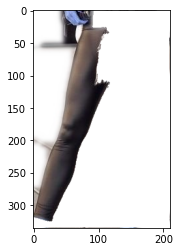

In [22]:
level1Meta = []

for contourIndex, tupl in enumerate(hierarchy[0]):
    # Filter the ones without parent
    if tupl[3] == -1:
        tupl = np.insert(tupl.copy(), 0, [contourIndex])
        level1Meta.append(tupl)
        
contoursWithArea = []
for tupl in level1Meta:
    contourIndex = tupl[0]
    contour = contours[contourIndex]
    area = cv2.contourArea(contour)
    contoursWithArea.append([contour, area, contourIndex])
    
contoursWithArea.sort(key=lambda meta: meta[1], reverse=True)
largestContour = contoursWithArea[0][0]

contourImg = cv2.imread('../DATA/WTF.jpg')
#cv2.drawContours(contourImg, [largestContour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)
cv2.fillPoly(contourImg, pts =[largestContour], color=(255,255,255))

plt.imshow(contourImg,cmap='gray')

In [518]:
cv2.imwrite("WTF.jpg",contourImg)

True